In [2]:
import pandas as pd
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
import re
warnings.filterwarnings("ignore")


C:\Users\jules\AppData\Local\Temp\ipykernel_4044\727113066.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jules\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
PATH_RATING = '../data/Books_rating_t.csv'
PATH_BOOKS = '../data/books_data_t.csv'
PATH_SAMPLE_RATING = '../data/Sample_Books_rating.csv'

In [25]:
def load_data(*,n_rating:int=-1):
    rating = pd.read_csv(PATH_RATING)
    books = pd.read_csv(PATH_BOOKS)
    return rating[:n_rating], books

def load_sample_data():
    rating = pd.read_csv(PATH_SAMPLE_RATING)
    books = pd.read_csv(PATH_BOOKS)
    return rating, books

In [5]:
def find_book_by_name(books:pd.DataFrame, book_name:str):
    return books[books['Titre'] == book_name]

In [6]:
rating, books = load_data()

In [7]:
find_book_by_name(books, book_name='Harry Potter and the Chamber of Secrets')

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
62999,Harry Potter and the Chamber of Secrets,"Witchcraft, wizardry - fiction.",['J. K. Rowling'],http://books.google.com/books/content?id=nmXTy...,http://books.google.com/books?id=nmXTy4FPfcwC&...,Raincoast Books,1999,http://books.google.com/books?id=nmXTy4FPfcwC&...,['Juvenile Fiction'],14.0


In [8]:
def get_most_scored_book(books:pd.DataFrame, n=10):
    books['Nb scores'] = pd.to_numeric(books['Nb scores'], errors='coerce')
    sorted_data = books.sort_values('Nb scores', ascending=False, inplace=False)
    return sorted_data[:n]

In [9]:
get_most_scored_book(books, n=10)

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
26834,The Alchemist,"""My heart is afraid that it will have to suffe...",['Paulo Coelho'],http://books.google.com/books/content?id=pTr44...,http://books.google.com/books?id=pTr44Sx6oWQC&...,Harper Collins,25/04/2006,http://books.google.com/books?id=pTr44Sx6oWQC&...,['Fiction'],4895.0
62005,A Mission to Millions; The Story of Ernie Alle...,#1 NEW YORK TIMES BESTSELLER • NOW A MAJOR MOT...,['Laura Hillenbrand'],http://books.google.com/books/content?id=1PeLD...,http://books.google.com/books?id=1PeLDQAAQBAJ&...,Random House Trade Paperbacks,29/07/2014,http://books.google.com/books?id=1PeLDQAAQBAJ&...,['Biography & Autobiography'],4572.0
76345,Unbroken,#1 NEW YORK TIMES BESTSELLER • NOW A MAJOR MOT...,['Laura Hillenbrand'],http://books.google.com/books/content?id=1PeLD...,http://books.google.com/books?id=1PeLDQAAQBAJ&...,Random House Trade Paperbacks,29/07/2014,http://books.google.com/books?id=1PeLDQAAQBAJ&...,['Biography & Autobiography'],4572.0
128081,Blue Like Jazz: Nonreligious Thoughts on Chris...,A popular minister recounts his zealous early ...,['Donald Miller'],http://books.google.com/books/content?id=fNC3f...,http://books.google.nl/books?id=fNC3fdxYgZMC&p...,Thomas Nelson Inc,2012-04,http://books.google.nl/books?id=fNC3fdxYgZMC&d...,['Biography & Autobiography'],4562.0
57822,Eclipse,As the love triangle heats up in the third boo...,['Stephenie Meyer'],http://books.google.com/books/content?id=lw99O...,http://books.google.com/books?id=lw99Oii9R90C&...,"Little, Brown Books for Young Readers",07/08/2007,https://play.google.com/store/books/details?id...,['Young Adult Fiction'],4392.0
127021,Redeeming Love,NATIONAL BESTSELLER • NOW A MAJOR MOTION PICTU...,['Francine Rivers'],http://books.google.com/books/content?id=I7eMl...,http://books.google.nl/books?id=I7eMlFZ-drcC&p...,Multnomah,04/08/2009,https://play.google.com/store/books/details?id...,['Fiction'],4249.0
112603,A Walk in the Woods,Traces the author's adventurous trek along the...,['Bill Bryson'],http://books.google.com/books/content?id=a-8nn...,http://books.google.nl/books?id=a-8nnowMab0C&q...,Broadway,1999,http://books.google.nl/books?id=a-8nnowMab0C&d...,['Travel'],4234.0
162135,The Tipping Point: How Little Things Can Make ...,An introduction to the Tipping Point theory ex...,['Malcolm Gladwell'],http://books.google.com/books/content?id=w6V_P...,http://books.google.com/books?id=w6V_PwAACAAJ&...,"Wheeler Publishing, Incorporated",2003,http://books.google.com/books?id=w6V_PwAACAAJ&...,['Reference'],4218.0
159446,"Travel Light, Eat Heavy Along the Appalachian ...","God only knows what possessed Bill Bryson, a r...",['Bill Bryson'],http://books.google.com/books/content?id=WnyDg...,http://books.google.com/books?id=WnyDgV_vNhsC&...,Anchor Canada,15/05/2012,http://books.google.com/books?id=WnyDgV_vNhsC&...,['Travel'],4161.0
31260,Henrietta,#1 NEW YORK TIMES BESTSELLER • “The story of m...,['Rebecca Skloot'],http://books.google.com/books/content?id=GFevO...,http://books.google.com/books?id=GFevO-QxQDgC&...,Crown,02/02/2010,https://play.google.com/store/books/details?id...,['Science'],4067.0


In [12]:
def corr_between_price_and_score(books:pd.DataFrame, rating:pd.DataFrame):
    titre_score = rating[['Titre', 'revue/score', 'Prix']].dropna()
    return titre_score[['Titre', 'Prix', 'revue/score']].corr(numeric_only=True)
    

In [13]:
corr_between_price_and_score(books, rating)

,Prix,revue/score
Prix,1.000000,-0.010513
revue/score,-0.010513,1.000000


In [14]:
def better_auteur(rating:pd.DataFrame, books:pd.DataFrame):
    top_auteurs = rating.merge(books[['Titre','Auteurs']], on='Titre')
    top_auteurs = top_auteurs[top_auteurs['revue/score'] == 5]
    top_auteurs = top_auteurs.groupby('Auteurs').size().sort_values(ascending=False).head(10)
    return top_auteurs

In [15]:
better_auteur(rating, books)

Auteurs
['J. R. R. Tolkien']             29252
['Jane Austen']                  24723
['Charles Dickens']              13224
['John Steinbeck']               10746
['John Ronald Reuel Tolkien']    10145
['C. S. Lewis']                   9031
['Harper Lee']                    8973
['J. K. Rowling']                 8324
['Kurt Vonnegut']                 7436
['George Orwell']                 7375
dtype: int64

In [16]:
def worst_auteur(rating:pd.DataFrame, books:pd.DataFrame):
    pire_auteurs = rating.merge(books[['Titre','Auteurs']], on='Titre')
    pire_auteurs = pire_auteurs[pire_auteurs['revue/score'] == 1]
    pire_auteurs = pire_auteurs.groupby('Auteurs').size().sort_values(ascending=False).head(10)
    return pire_auteurs
    

In [17]:
worst_auteur(rating, books) 

Auteurs
['Robert Jordan']                2518
['Jane Austen']                  1418
['Charles Dickens']              1390
['Thomas Harris']                1387
['Tom Clancy']                   1170
['BusinessNews Publishing']      1098
['Emily Bronte']                  924
['J. R. R. Tolkien']              907
['William Golding']               900
['Patricia Daniels Cornwell']     864
dtype: int64

In [18]:
def get_most_scored_book_foreach_rating(books:pd.DataFrame, rating:pd.DataFrame, n=10):
    top_pos_livre = rating[rating['revue/score'] > 3]
    top_pos_livre = top_pos_livre.groupby('Titre').size().sort_values(ascending=False)[:n]
    top_neg_livre = rating[rating['revue/score'] < 3]
    top_neg_livre = top_neg_livre.groupby('Titre').size().sort_values(ascending=False)[:n]
    top_neutre_livre = rating[rating['revue/score'] == 3]
    top_neutre_livre = top_neutre_livre.groupby('Titre').size().sort_values(ascending=False)[:n]
    return top_pos_livre, top_neg_livre, top_neutre_livre

In [16]:
top_pos_livre, top_neg_livre, top_neutre_livre= get_most_scored_book_foreach_rating(books, rating, n=10)

In [17]:
top_pos_livre.head(), top_neg_livre.head(), top_neutre_livre.head()

(Titre
 The Hobbit             20455
 Pride and Prejudice    18013
 Atlas Shrugged          9216
 Wuthering Heights       7992
 The Giver               6442
 dtype: int64,
 Titre
 Atlas Shrugged                                         2305
 Crossroads of Twilight (The Wheel of Time, Book 10)    1959
 Wuthering Heights                                      1529
 Pride and Prejudice                                    1273
 The Bear and the Dragon                                1242
 dtype: int64,
 Titre
 Wuthering Heights      1259
 Pride and Prejudice    1085
 Atlas Shrugged          992
 The Hobbit              782
 The Giver               636
 dtype: int64)

In [18]:
def distribution_of_book_score(books:pd.DataFrame, top_n=10):
    books['Genre'] = books['Genre'].str.replace("^\['|']$", "", regex=True)
    books['Genre'].value_counts().nlargest(top_n).plot(kind='bar', figsize=(10, 6), title='Top 20 Genres')

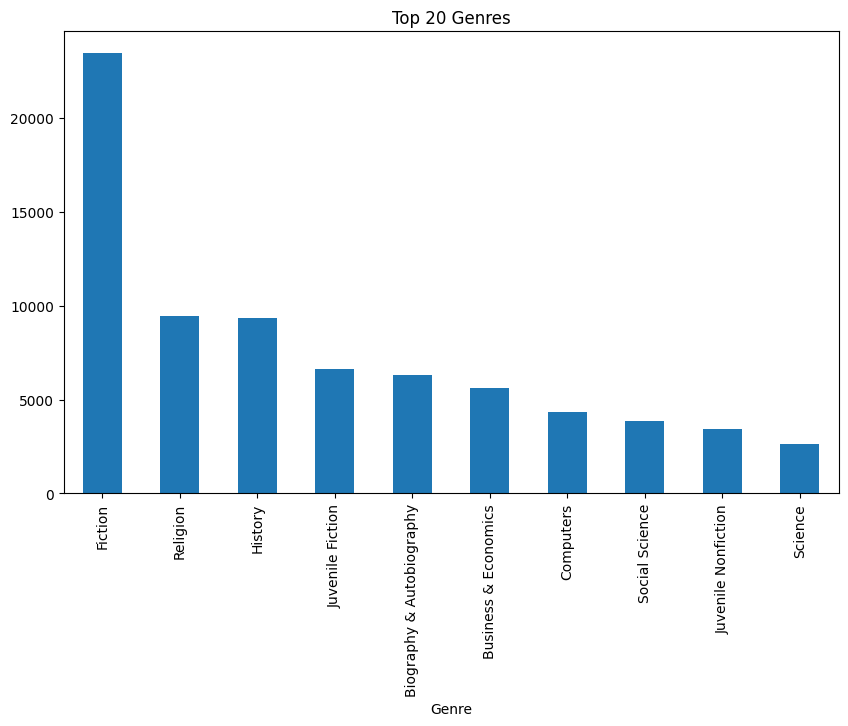

In [19]:
distribution_of_book_score(books)

In [32]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import re

def get_most_freq_words(rating: pd.DataFrame):
    sw_set = set(stopwords.words('english'))
    rating['all text'] = (rating['revue/résumé'] + rating['revue/texte']).str.lower()
    text = ' '.join(rating.loc[rating['revue/score'] >= 5, 'all text'].dropna())
    words = re.findall(r'\b\w+\b', text)
    text_without_stopwords = [word for word in words if word not in sw_set]
    common_words = Counter(text_without_stopwords).most_common(10)
    return common_words


In [36]:
word_freq = get_most_freq_words(rating)

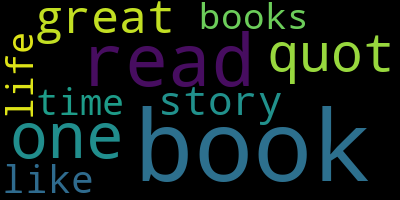

In [37]:
#word cloud
from wordcloud import WordCloud
WordCloud().generate_from_frequencies(dict(word_freq)).to_image()

In [23]:
def show_distribution_of_score(rating:pd.DataFrame):
    rating['polarity'] = rating['revue/score'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')
    print(rating['polarity'].value_counts())
    rating['polarity'].value_counts().plot(kind='bar', figsize=(10, 6), title='Distribution of Score')

polarity
positive    2392959
negative     352745
neutral      254295
Name: count, dtype: int64


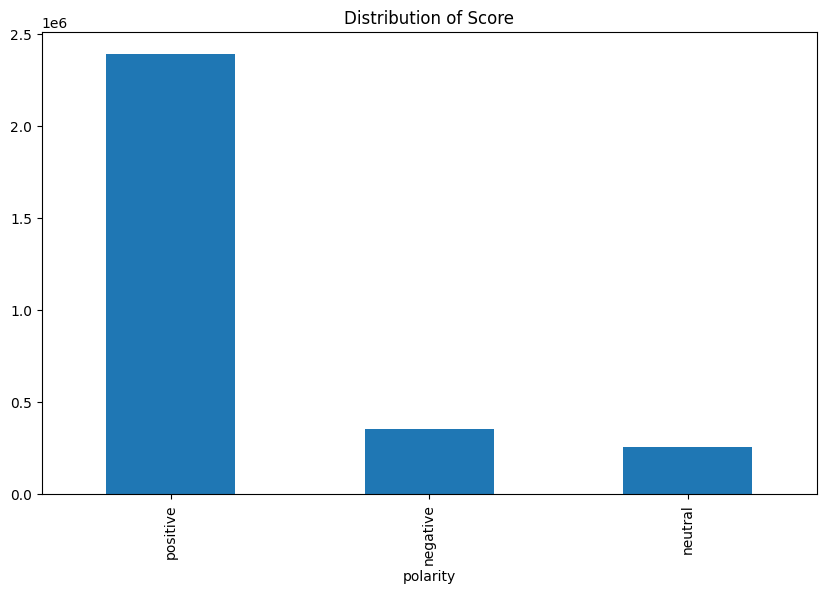

In [24]:
show_distribution_of_score(rating)

In [38]:
sample, a = load_sample_data()


polarity
positive    8023
negative    1181
neutral      796
Name: count, dtype: int64


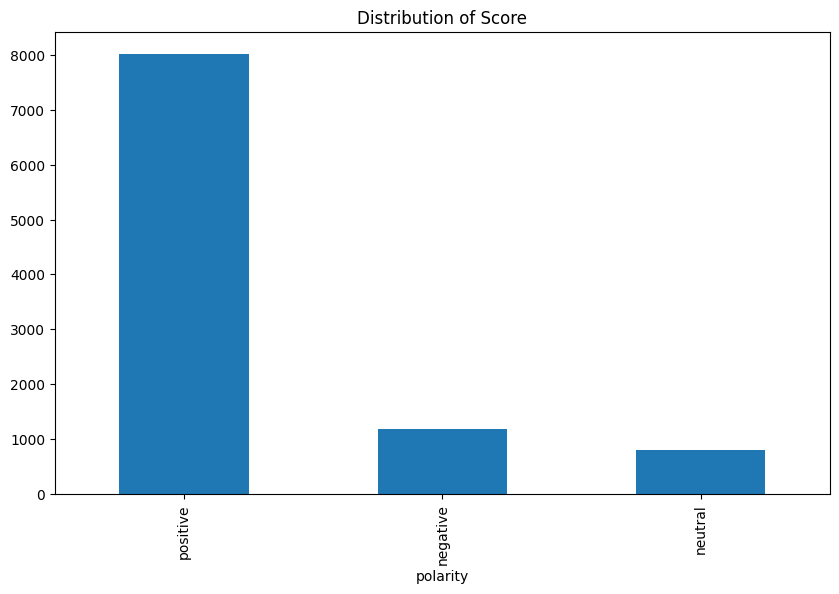

In [39]:
show_distribution_of_score(sample)

In [41]:
from sklearn.preprocessing import OrdinalEncoder
def get_corr_between_editor_and_score(books:pd.DataFrame, rating:pd.DataFrame):
    titre_score = rating[['Titre', 'revue/score']]
    titre_score = titre_score.merge(books[['Titre', 'Editeur']], on='Titre')
    titre_score = titre_score.dropna()
    encode = OrdinalEncoder()
    titre_score['Editeur'] = encode.fit_transform(titre_score[['Editeur']])
    return titre_score[['Editeur', 'revue/score']].corr(numeric_only=True)
    
    

In [45]:
def get_all_corr(books:pd.DataFrame, rating:pd.DataFrame):
    rating = rating.dropna()
    rating = rating.drop(columns=['revue/heure','revue/résumé','revue/texte'])
    merged = rating.merge(books, on='Titre')
    columns = merged.columns
    ordinal = OrdinalEncoder()
    merged = ordinal.fit_transform(merged)
    merged = pd.DataFrame(merged, columns=columns)
    return merged.corr()

In [46]:
get_all_corr(books, rating)

,Titre,Description,Auteurs,Image,Lien Google,Editeur,Date publication,infoLink,Genre,Nb scores
Titre,1.000000,0.041525,0.050237,0.008300,-0.007161,0.001626,0.006753,0.017610,0.001378,-0.029846
Description,0.041525,1.000000,0.006488,-0.009062,0.003520,0.018298,-0.006657,0.040632,0.019186,0.043553
Auteurs,0.050237,0.006488,1.000000,0.019973,0.006618,0.029393,-0.024898,0.024137,0.022094,-0.008757
Image,0.008300,-0.009062,0.019973,1.000000,0.654745,0.031319,-0.003203,0.394307,0.003230,0.009256
Lien Google,-0.007161,0.003520,0.006618,0.654745,1.000000,0.025157,0.020606,0.546618,0.003119,0.041580
Editeur,0.001626,0.018298,0.029393,0.031319,0.025157,1.000000,-0.045694,0.030350,0.021441,0.001119
Date publication,0.006753,-0.006657,-0.024898,-0.003203,0.020606,-0.045694,1.000000,-0.063833,-0.030345,0.042132
infoLink,0.017610,0.040632,0.024137,0.394307,0.546618,0.030350,-0.063833,1.000000,0.058712,0.070491
Genre,0.001378,0.019186,0.022094,0.003230,0.003119,0.021441,-0.030345,0.058712,1.000000,-0.105275
Nb scores,-0.029846,0.043553,-0.008757,0.009256,0.041580,0.001119,0.042132,0.070491,-0.105275,1.000000


In [42]:
get_corr_between_editor_and_score(books, rating)

,Editeur,revue/score
Editeur,1.000000,-0.005736
revue/score,-0.005736,1.000000
